# Guardian analysis:
## proportion + line graph
###           Yue Y



In [17]:
import requests
import pandas as pd

### Calculating proportion 

#### total number of articles per year

In [30]:
#calculating proportion
import requests

def count_articles_by_year(api_key, from_date, to_date):
    base_url = "https://content.guardianapis.com/search"
    
    total_articles_by_year = {}
    
    # Extract start and end years
    start_year = int(from_date[:4])
    end_year = int(to_date[:4]) + 1  # Add 1 to include the end year
    
    for year in range(start_year, end_year):
        # Set the from-date and to-date parameters for the current year
        year_from_date = f"{year}-01-01"
        year_to_date = f"{year}-12-31"
        
        params = {
            'api-key': api_key,
            'from-date': year_from_date,
            'to-date': year_to_date,
            'page-size': 1,  # Set page size to 1 as we're only interested in checking the existence of articles
        }
        
        response = requests.get(base_url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            total = data.get('response', {}).get('total', 0)
            total_articles_by_year[str(year)] = total
        else:
            print(f"Error: {response.status_code}, {response.text}")
            total_articles_by_year[str(year)] = 0  # Set count to 0 for the current year in case of error
    
    return total_articles_by_year

# Example usage:
api_key = '93eb884c-6abd-444e-aba9-95bba2d84dad'
from_date = '2004-01-01'
to_date = '2024-02-07'

total_articles_by_year = count_articles_by_year(api_key, from_date, to_date)

for year, count in total_articles_by_year.items():
    print(f"Year: {year}, Total Articles: {count}")

Year: 2004, Total Articles: 97873
Year: 2005, Total Articles: 99939
Year: 2006, Total Articles: 108381
Year: 2007, Total Articles: 125860
Year: 2008, Total Articles: 144090
Year: 2009, Total Articles: 122035
Year: 2010, Total Articles: 108920
Year: 2011, Total Articles: 118663
Year: 2012, Total Articles: 120930
Year: 2013, Total Articles: 125551
Year: 2014, Total Articles: 123103
Year: 2015, Total Articles: 118486
Year: 2016, Total Articles: 110396
Year: 2017, Total Articles: 85363
Year: 2018, Total Articles: 80131
Year: 2019, Total Articles: 78754
Year: 2020, Total Articles: 78924
Year: 2021, Total Articles: 76842
Year: 2022, Total Articles: 78967
Year: 2023, Total Articles: 77315
Year: 2024, Total Articles: 10121


In [ ]:
#according to chatgpt, i added pages and loop through each pages. 
def search_guardian_api(api_key, query, from_date, to_date):
    base_url = "https://content.guardianapis.com/search"
    
    params = {
        'api-key': api_key,
        'q': query,
        'order-by': 'newest',
        'from-date': from_date,
        'to-date': to_date,
        'show-fields': 'headline,bodyText,webPublicationDate',  
        'section': 'society' or 'wellness' 
    }
    
    all_articles = []
    page = 1
    total_articles = float('inf')  # Initialize to infinity
    
    while len(all_articles) < total_articles:
        params['page'] = page
        response = requests.get(base_url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            articles = data.get('response', {}).get('results', [])
            total_articles = data.get('response', {}).get('total', 0)
            
            for article in articles:
                headline = article.get('fields', {}).get('headline', '')
                publication_date = article.get('webPublicationDate', '')
                body_text = article.get('fields', {}).get('bodyText', '')
                all_articles.append({'Headline': headline, 'Publication Date': publication_date, 'Body Text': body_text})
            
            page += 1
        else:
            print(f"Error: {response.status_code}, {response.text}")
            break
    
    return all_articles

api_key = '93eb884c-6abd-444e-aba9-95bba2d84dad'
query = 'anxiety'
from_date = '2004-01-01'
to_date = '2024-02-07'

anxiety_articles = search_guardian_api(api_key, query, from_date, to_date)
df = pd.DataFrame(anxiety_articles)
df.to_csv('anxiety_articles.csv', index=False)

In [3]:
# Convert 'Publication Date' column to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Extract year from 'Publication Date' and create a new column
df['Year'] = df['Publication Date'].dt.year

# Count the number of articles for each year
yearly_counts = df['Year'].value_counts().sort_index()

# Display the yearly counts
print(yearly_counts)

2004    156
2005    146
2006    107
2007     94
2008     99
2009     87
2010     68
2011    135
2012     78
2013    113
2014    145
2015    140
2016    206
2017    183
2018    198
2019    203
2020    215
2021    193
2022    191
2023    168
2024     24
Name: Year, dtype: int64


In [33]:
# Define the counts of anxiety articles
anxiety_counts = {
    2004: 156, 2005: 146, 2006: 107, 2007: 94, 2008: 99, 2009: 87, 2010: 68,
    2011: 135, 2012: 78, 2013: 113, 2014: 145, 2015: 140, 2016: 206, 2017: 183,
    2018: 198, 2019: 203, 2020: 215, 2021: 193, 2022: 191, 2023: 168, 2024: 24
}

# Define the total counts of articles for each year
total_articles = {
    2004: 97873, 2005: 99939, 2006: 108381, 2007: 125860, 2008: 144090, 2009: 122035,
    2010: 108920, 2011: 118663, 2012: 120930, 2013: 125551, 2014: 123103, 2015: 118486,
    2016: 110396, 2017: 85363, 2018: 80131, 2019: 78754, 2020: 78924, 2021: 76842,
    2022: 78967, 2023: 77315, 2024: 10121
}

# Calculate the proportion of anxiety articles to total articles for each year
proportion_anxiety_articles = {}
for year in range(2004, 2025):
    if total_articles[year] != 0:  # Avoid division by zero
        proportion_anxiety_articles[year] = anxiety_counts[year] / total_articles[year]
    else:
        proportion_anxiety_articles[year] = 0  # If total articles is 0, set proportion to 0

# Display the proportion of anxiety articles published for each year
for year, proportion in proportion_anxiety_articles.items():
    print(f"Year: {year}, Proportion of Anxiety Articles: {proportion:.4f}")

Year: 2004, Proportion of Anxiety Articles: 0.0016
Year: 2005, Proportion of Anxiety Articles: 0.0015
Year: 2006, Proportion of Anxiety Articles: 0.0010
Year: 2007, Proportion of Anxiety Articles: 0.0007
Year: 2008, Proportion of Anxiety Articles: 0.0007
Year: 2009, Proportion of Anxiety Articles: 0.0007
Year: 2010, Proportion of Anxiety Articles: 0.0006
Year: 2011, Proportion of Anxiety Articles: 0.0011
Year: 2012, Proportion of Anxiety Articles: 0.0006
Year: 2013, Proportion of Anxiety Articles: 0.0009
Year: 2014, Proportion of Anxiety Articles: 0.0012
Year: 2015, Proportion of Anxiety Articles: 0.0012
Year: 2016, Proportion of Anxiety Articles: 0.0019
Year: 2017, Proportion of Anxiety Articles: 0.0021
Year: 2018, Proportion of Anxiety Articles: 0.0025
Year: 2019, Proportion of Anxiety Articles: 0.0026
Year: 2020, Proportion of Anxiety Articles: 0.0027
Year: 2021, Proportion of Anxiety Articles: 0.0025
Year: 2022, Proportion of Anxiety Articles: 0.0024
Year: 2023, Proportion of Anxie

###### a plot to visualize the change of proportion

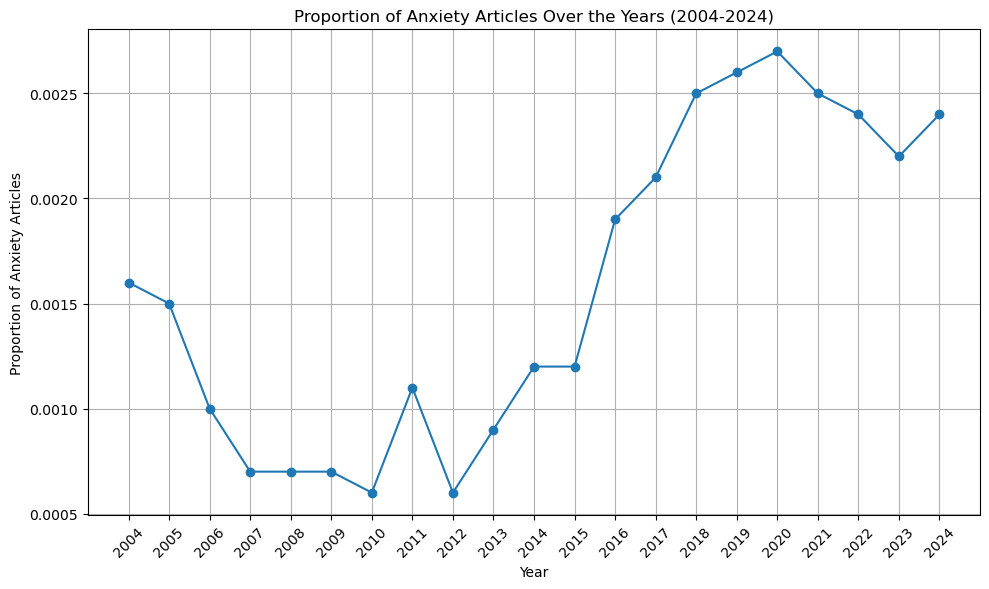

In [12]:
# Data
years = list(range(2004, 2025))
proportions = [
    0.0016, 0.0015, 0.001, 0.0007, 0.0007, 0.0007, 0.0006, 0.0011, 0.0006, 
    0.0009, 0.0012, 0.0012, 0.0019, 0.0021, 0.0025, 0.0026, 0.0027, 0.0025, 
    0.0024, 0.0022, 0.0024
]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, proportions, marker='o', linestyle='-')
plt.title('Proportion of Anxiety Articles Over the Years (2004-2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Anxiety Articles')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

#### hooray! We can actually see an significant increase, reached a peak during 2020, when  the pandemic hits the hardest

## For Depression

In [4]:
def search_guardian_api(api_key, query, from_date, to_date):
    base_url = "https://content.guardianapis.com/search"
    
    params = {
        'api-key': api_key,
        'q': query,
        'order-by': 'newest',
        'from-date': from_date,
        'to-date': to_date,
        'show-fields': 'headline,bodyText,webPublicationDate',  
        'section': 'society' or 'wellness' 
    }
    
    all_articles = []
    page = 1
    total_articles = float('inf')  # Initialize to infinity
    
    while len(all_articles) < total_articles:
        params['page'] = page
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            data = response.json()
            articles = data.get('response', {}).get('results', [])
            total_articles = data.get('response', {}).get('total', 0)
            
            for article in articles:
                headline = article.get('fields', {}).get('headline', '')
                publication_date = article.get('webPublicationDate', '')
                body_text = article.get('fields', {}).get('bodyText', '')
                all_articles.append({'Headline': headline, 'Publication Date': publication_date, 'Body Text': body_text})
            
            page += 1
        else:
            print(f"Error: {response.status_code}, {response.text}")
            break
    
    return all_articles


api_key = '93eb884c-6abd-444e-aba9-95bba2d84dad'
query = 'depression'
from_date = '2004-01-01'
to_date = '2024-02-07'

depression_articles = search_guardian_api(api_key, query, from_date, to_date)
dfd = pd.DataFrame(depression_articles)
dfd.to_csv('depression_articles.csv', index=False)

In [5]:
# Convert 'Publication Date' column to datetime
dfd['Publication Date'] = pd.to_datetime(dfd['Publication Date'])

# Extract year from 'Publication Date' and create a new column
dfd['Year'] = dfd['Publication Date'].dt.year

# Count the number of articles for each year
yearly_counts_d = dfd['Year'].value_counts().sort_index()

# Display the yearly counts
print(yearly_counts_d)
print(len(dfd))

# Save DataFrame to CSV
dfd.to_csv('depression_articles.csv', index=False)

2004    224
2005    166
2006    154
2007    147
2008    167
2009    133
2010     90
2011    160
2012    124
2013    132
2014    181
2015    164
2016    177
2017    161
2018    181
2019    181
2020    135
2021    126
2022    129
2023    147
2024     13
Name: Year, dtype: int64
3092


#### Proportion of depression articles

In [34]:
depression_counts = {
    2004: 224, 2005: 166, 2006: 154, 2007: 147, 2008: 167, 2009: 133, 2010: 90,
    2011: 160, 2012: 124, 2013: 132, 2014: 181, 2015: 164, 2016: 177, 2017: 161,
    2018: 181, 2019: 181, 2020: 135, 2021: 126, 2022: 129, 2023: 147, 2024: 13
}

# Calculate the proportion of depression articles to total articles for each year
proportion_depression_articles = {}
for year in range(2004, 2025):
    if total_articles[year] != 0:  # Avoid division by zero
        proportion_depression_articles[year] = depression_counts[year] / total_articles[year]
    else:
        proportion_depression_articles[year] = 0  # If total articles is 0, set proportion to 0

# Display the proportion of depression articles published for each year
for year, proportion in proportion_depression_articles.items():
    print(f"Year: {year}, Proportion of Depression Articles: {proportion:.4f}")

Year: 2004, Proportion of Depression Articles: 0.0023
Year: 2005, Proportion of Depression Articles: 0.0017
Year: 2006, Proportion of Depression Articles: 0.0014
Year: 2007, Proportion of Depression Articles: 0.0012
Year: 2008, Proportion of Depression Articles: 0.0012
Year: 2009, Proportion of Depression Articles: 0.0011
Year: 2010, Proportion of Depression Articles: 0.0008
Year: 2011, Proportion of Depression Articles: 0.0013
Year: 2012, Proportion of Depression Articles: 0.0010
Year: 2013, Proportion of Depression Articles: 0.0011
Year: 2014, Proportion of Depression Articles: 0.0015
Year: 2015, Proportion of Depression Articles: 0.0014
Year: 2016, Proportion of Depression Articles: 0.0016
Year: 2017, Proportion of Depression Articles: 0.0019
Year: 2018, Proportion of Depression Articles: 0.0023
Year: 2019, Proportion of Depression Articles: 0.0023
Year: 2020, Proportion of Depression Articles: 0.0017
Year: 2021, Proportion of Depression Articles: 0.0016
Year: 2022, Proportion of De

##### a plot to visualize 

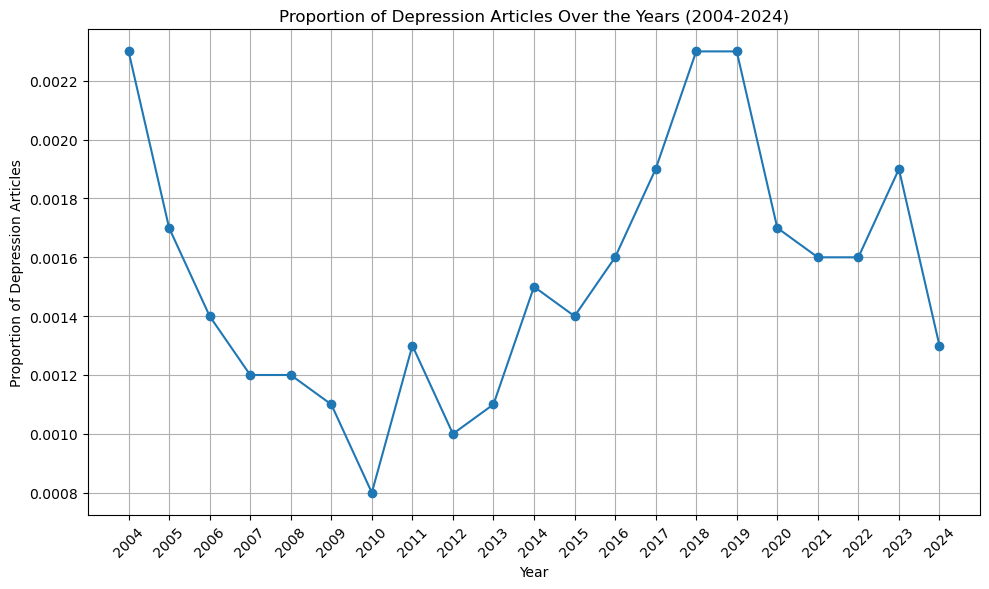

In [13]:
years = list(range(2004, 2025))
proportions = [
    0.0023, 0.0017, 0.0014, 0.0012, 0.0012, 0.0011, 0.0008, 0.0013, 0.001, 
    0.0011, 0.0015, 0.0014, 0.0016, 0.0019, 0.0023, 0.0023, 0.0017, 0.0016, 
    0.0016, 0.0019, 0.0013
]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, proportions, marker='o', linestyle='-')
plt.title('Proportion of Depression Articles Over the Years (2004-2024)')
plt.xlabel('Year')
plt.ylabel('Proportion of Depression Articles')
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()

# Show plot
plt.show()

#### as for depression, it's not that salient, we need to carry out further investiagtion to see if "depression" may also refer to other things

In [6]:
print(len(depression_articles))
print(len(anxiety_articles))

3092
2949


In [13]:
#data clearning code written by Kexin
import pandas as pd
from datetime import datetime
import re

anxiety_df = pd.read_csv('anxiety_articles.csv', low_memory=False)
depression_df = pd.read_csv('depression_articles.csv', low_memory=False)

anxiety_df['Anxiety or Depression'] = 0  # 0 for anxiety articles
depression_df['Anxiety or Depression'] = 1  # 1 for depression articles

combined_df = pd.concat([anxiety_df, depression_df], ignore_index=True)

combined_df.rename(columns={'Headline': 'Title'}, inplace=True)

combined_df['Sources'] = '1' # 1 for The Guardian

# Convert 'Publication Date' to datetime and remove rows with invalid or missing dates
combined_df['Publication Date'] = pd.to_datetime(combined_df['Publication Date'], errors='coerce')
combined_df = combined_df.dropna(subset=['Publication Date'])

# Remove timezone information from 'Publication Date'
combined_df['Publication Date'] = combined_df['Publication Date'].dt.tz_localize(None)

# Extract 'Month', 'Date', and 'Year'
combined_df['Month'] = combined_df['Publication Date'].dt.month
combined_df['Date'] = combined_df['Publication Date'].dt.day
combined_df['Year'] = combined_df['Publication Date'].dt.year

# Define the criteria for 'Time frame'
pre_date = datetime.strptime('2020-03-11', '%Y-%m-%d')
post_date = datetime.strptime('2023-05-11', '%Y-%m-%d')

# Function to determine the 'Time frame'
def determine_time_frame(row):
    if row['Publication Date'] < pre_date:
        return 0  # Pre
    elif row['Publication Date'] <= post_date:
        return 1  # During
    else:
        return 2  # Post

# Apply the function to set the 'Time frame'
combined_df['Time frame'] = combined_df.apply(determine_time_frame, axis=1)

# Remove the original 'Publication Date' column
combined_df.drop(columns=['Publication Date'], inplace=True)

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # 转换为小写
        text = re.sub(r'[^\w\s]', '', text)  # 移除非字母数字字符
        text = re.sub(r'\s+', ' ', text).strip()  # 将多个空格替换为单个空格，去除首尾空格
    else:
        text = ""
    return text

combined_df['Title'] = combined_df['Title'].apply(clean_text)
combined_df['Body Text'] = combined_df['Body Text'].apply(clean_text)

combined_df.dropna(subset=['Title', 'Body Text'], inplace=True)

combined_df = combined_df[['Sources', 'Month', 'Date', 'Year',
                           'Anxiety or Depression', 'Title',
                           'Body Text', 'Time frame']]

combined_df.to_csv('combined_articles.csv', index=False)

### Line Show frequency of articles over months (July 1, 2019-January 31, 2024) 


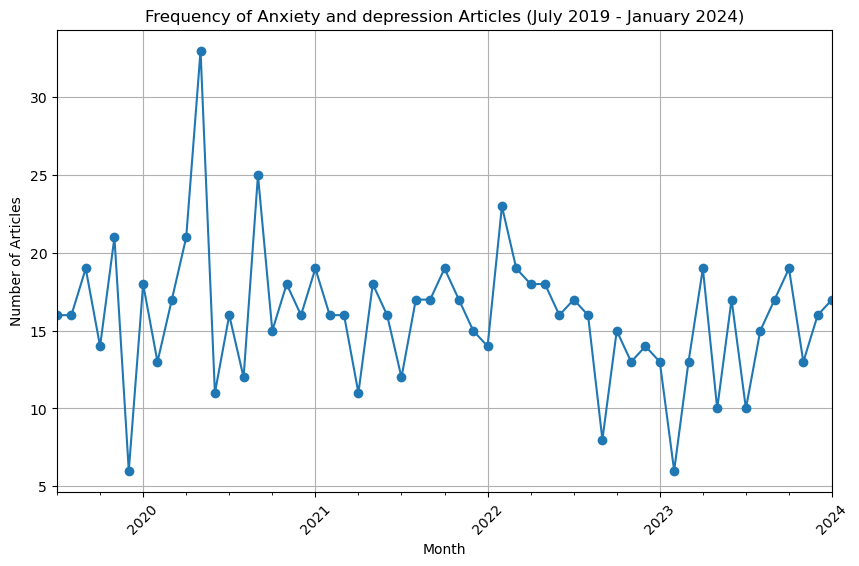

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the combined DataFrame from the CSV file
combined_df = pd.read_csv('combined_articles.csv')

# Convert 'Year' and 'Month' columns to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Year'].astype(str) + '-' + combined_df['Month'].astype(str), format='%Y-%m')

# Filter articles within the specified time frame (July 1, 2019 to January 31, 2024)
filtered_df = combined_df[(combined_df['Date'] >= '2019-07-01') & (combined_df['Date'] <= '2024-01-31')]

# Group by month and count the number of anxiety articles
monthly_counts = filtered_df[filtered_df['Anxiety or Depression'] == 0].groupby('Date').size()

# Plot the frequency of anxiety articles over months
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Frequency of Anxiety and depression Articles (July 2019 - January 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

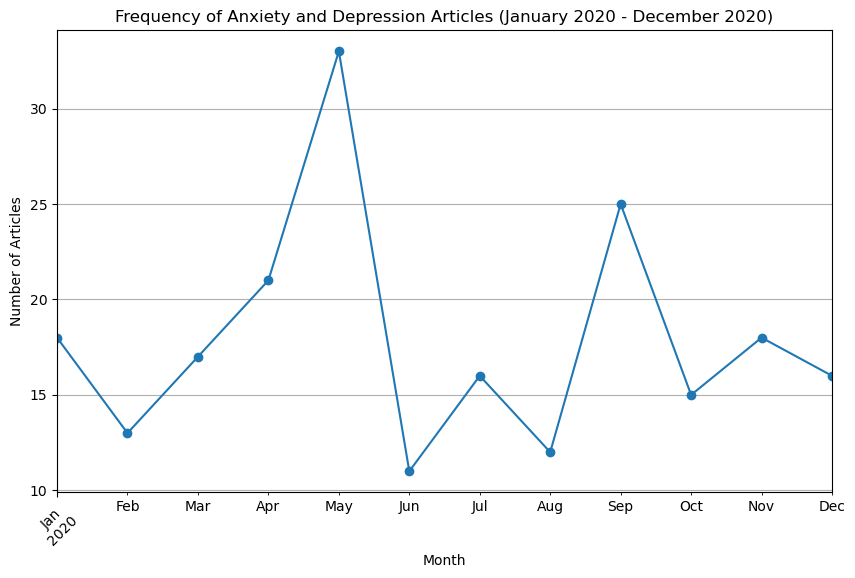

In [11]:

# Read the combined DataFrame from the CSV file
combined_df = pd.read_csv('combined_articles.csv')

# Convert 'Year' and 'Month' columns to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Year'].astype(str) + '-' + combined_df['Month'].astype(str), format='%Y-%m')

# Filter articles within the specified time frame (January 1, 2020 to December 31, 2020)
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2020-12-31')]

# Group by month and count the number of anxiety articles
monthly_counts = filtered_df[filtered_df['Anxiety or Depression'] == 0].groupby('Date').size()

# Plot the frequency of anxiety articles over months for the year 2020
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Frequency of Anxiety and Depression Articles (January 2020 - December 2020)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### we can see a significant increase in APR and May. maybe check news to see if any regulation impacted.